In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [2]:
sns.set_context(
    "notebook",
    font_scale=1.5,
    rc={
        "figure.figsize": (11, 8),
        "axes.titlesize": 18
    })

from matplotlib import rcParams

rcParams['figure.figsize'] = 11, 8

In [3]:
df = pd.read_csv('mlcourse.ai/data/mlbootcamp5_train.csv', delimiter=";")
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


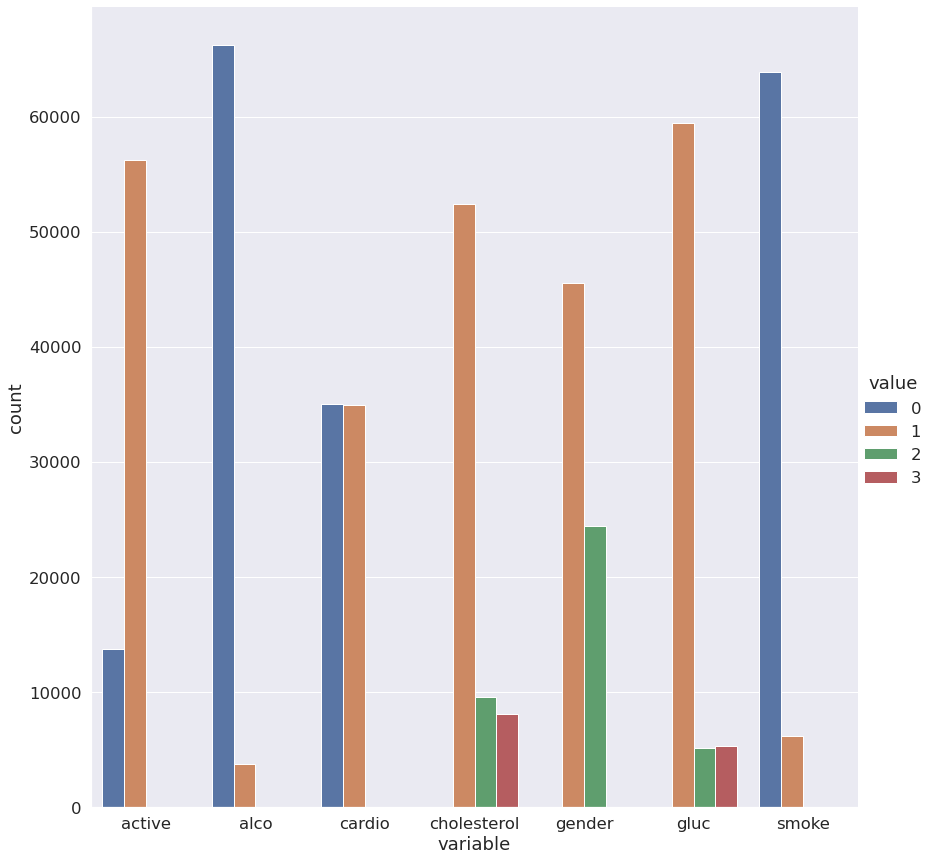

In [4]:
df_uniques = pd.melt(frame=df, value_vars=['gender', 'cholesterol',
                                           'gluc', 'smoke',
                                           'alco', 'active',
                                           'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable',
                                              'value'])['value'].count()) \
                                    .sort_index(level=[0, 1]) \
                                    .rename(columns={'value': 'count'}) \
                                    .reset_index()
sns.factorplot(x='variable', y='count', hue='value',
               data=df_uniques, kind='bar', size=12);

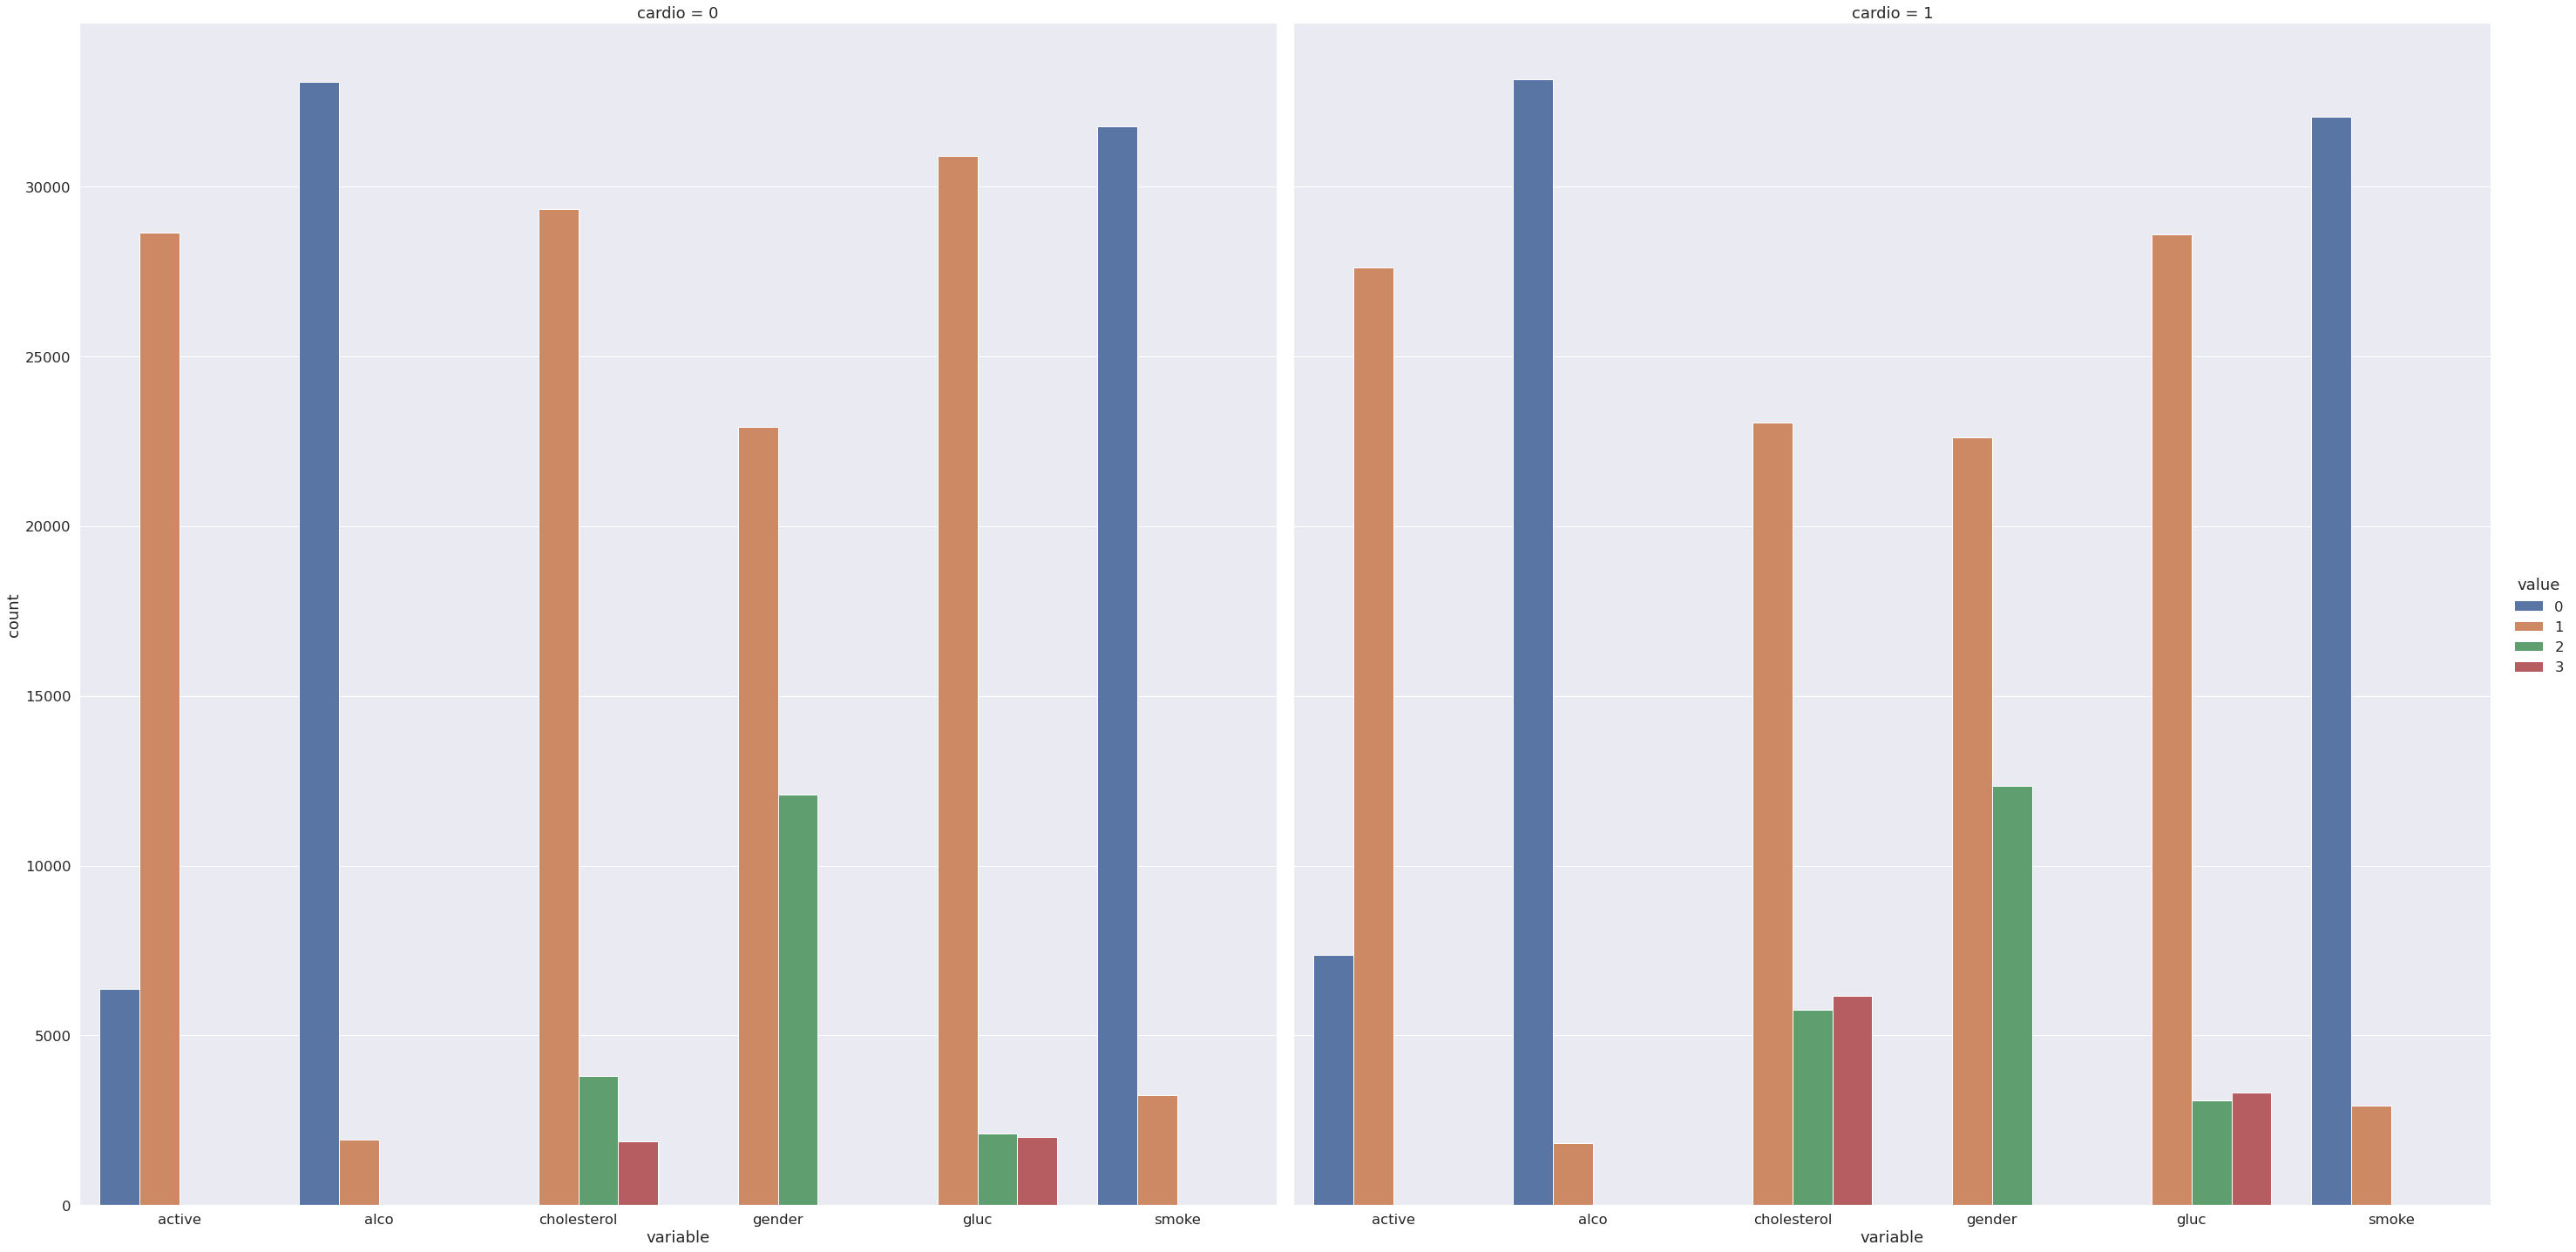

In [5]:
df_uniques = pd.melt(frame=df, value_vars=['gender', 'cholesterol',
                                           'gluc', 'smoke',
                                           'alco', 'active'],
                    id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 'cardio'])
                         ['value'].count()) \
                        .sort_index(level=[0, 1])\
                        .rename(columns={'value': 'count'})\
                        .reset_index()

sns.factorplot(x='variable', y='count', hue='value', col='cardio',
               data=df_uniques, kind='bar', size=20);

In [6]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print('-' * 10)

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [7]:
genders = df.groupby(['gender'])

In [8]:
genders['height'].agg(np.mean)
# 1 - woman
# 2 - man

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [9]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [10]:
genders['alco'].value_counts()
# men report consuming alco more frequently

gender  alco
1       0       44369
        1        1161
2       0       21867
        1        2603
Name: alco, dtype: int64

In [11]:
persmk = genders['smoke'].agg(np.mean)
print(persmk)
print(f'Difference between the percentages of smokers: {np.round((persmk[2] - persmk[1]) * 100)}')

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64
Difference between the percentages of smokers: 20.0


In [12]:
medsmk = df.groupby(['smoke'])['age'].agg(np.median)
print(medsmk)
print(f'Difference between median age for smokers and non-smokers: {np.round((medsmk[0] - medsmk[1]) / 30)}')

smoke
0    19722
1    19125
Name: age, dtype: int64
Difference between median age for smokers and non-smokers: 20.0


In [13]:
miy = 365.25
df['age-years'] = np.round(df['age'] / miy)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age-years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [15]:
risk_df = df[(60.0 <= df['age-years']) & (df['age-years'] <= 64.0) &
             (df['gender'] == 2) & (df['smoke'] == 1)]
risk_df.shape

(987, 14)

In [20]:
lb = risk_df[risk_df['ap_hi'] < 120]['cardio'].mean()

In [21]:
ub = risk_df[(160 <= risk_df['ap_hi']) & (risk_df['ap_hi'] < 180)]['cardio'].mean()

In [23]:
print(np.round(ub / lb))

3.0


In [24]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age-years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [25]:
df['bmi'] = np.round(df['weight'] / ((df['height'] / 100) ** 2), 2)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age-years,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.01


In [26]:
df['bmi'].mean()

27.556545285714286

In [27]:
bmig = df.groupby(['gender'])['bmi'].mean()
print(bmig)
if bmig[1] < bmig[2]:
    print("For men are higher")
else:
    print("For women are higher")

gender
1    27.987624
2    26.754461
Name: bmi, dtype: float64
For women are higher


In [28]:
bmic = df.groupby(['cardio'])['bmi'].mean()
print(bmic)
if bmic[0] < bmic[1]:
    print("People with CVD have a higher BMI")
else:
    print("People without CVD have a higher BMI")

cardio
0    26.548222
1    28.566079
Name: bmi, dtype: float64
People with CVD have a higher BMI


In [29]:
hndp = df[(df['cardio'] == 0) & (df['alco'] == 0)]
bmihndp = hndp.groupby('gender')['bmi'].mean()
if bmihndp[1] < bmihndp[2]:
    print('For women are closer')
else:
    print('For men are closer')

For men are closer


In [31]:
filtered_df = df[(df['ap_lo'] < df['ap_hi']) &
        (df['height'].quantile(.025) <= df['height']) &
        (df['height'] <= df['height'].quantile(.975)) &
        (df['weight'].quantile(.025) <= df['weight']) &
        (df['weight'] <= df['weight'].quantile(.975))]
print(filtered_df.shape)
filtered_df.head()

(63258, 15)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age-years,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.01


In [32]:
print(np.round((df.shape[0] - filtered_df.shape[0]) / df.shape[0] * 100))

10.0


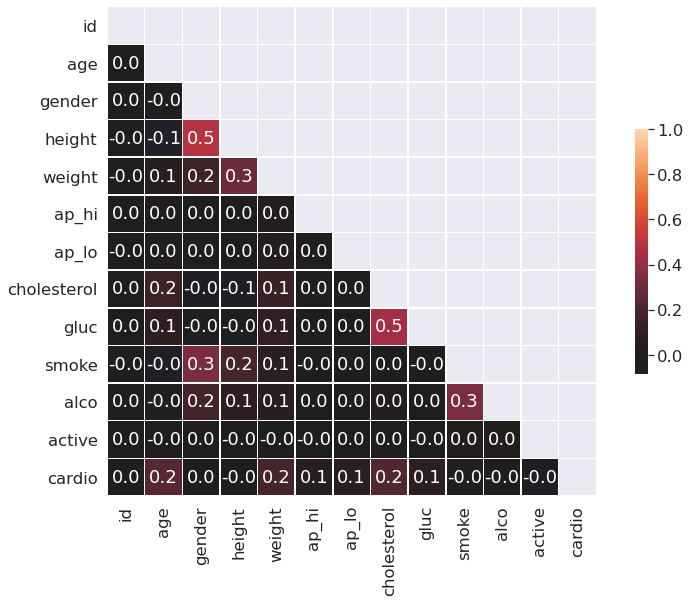

In [45]:
corr_mat = df.drop(['age-years', 'bmi'], axis=1).corr()
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corr_mat, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidth=.5, cbar_kws={'shrink': .5}); # Height and smoke have the strongest correlation with Gender

In [33]:
sns.heatmap?

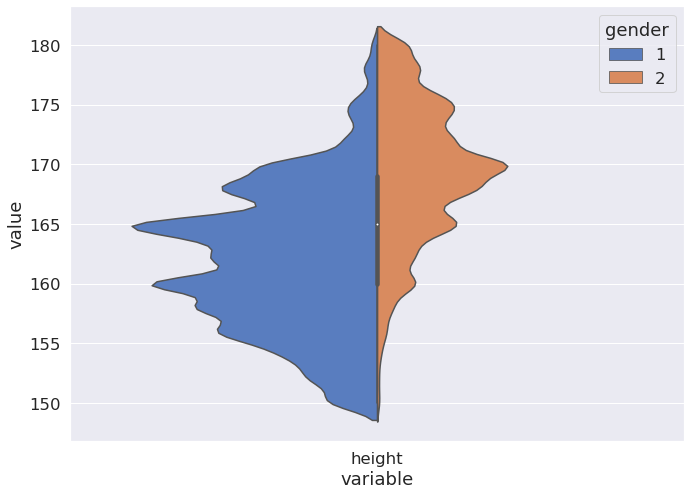

In [55]:
df_new = pd.melt(filtered_df, value_vars=['height'], id_vars='gender')
sns.violinplot(x='variable', y='value', hue='gender', palette='muted', split=True, data=df_new, scale='count', scale_hue=False);

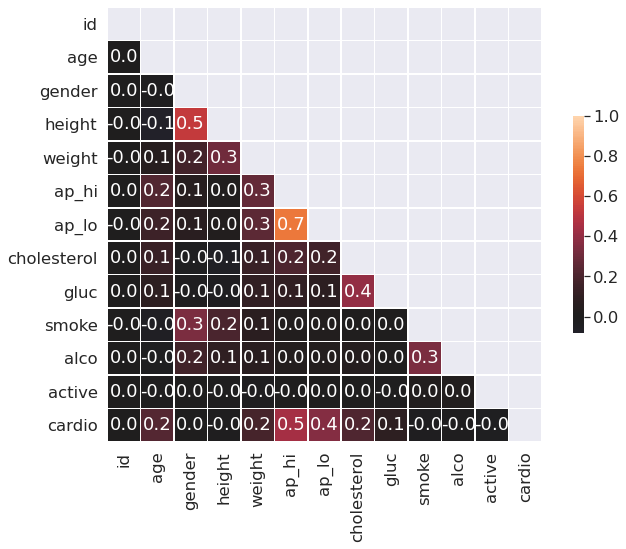

In [56]:
corr_sp = df.drop(['age-years', 'bmi'], axis=1).corr('spearman')
mask = np.zeros_like(corr_sp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_sp, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidth=.5, cbar_kws={'shrink': .5});

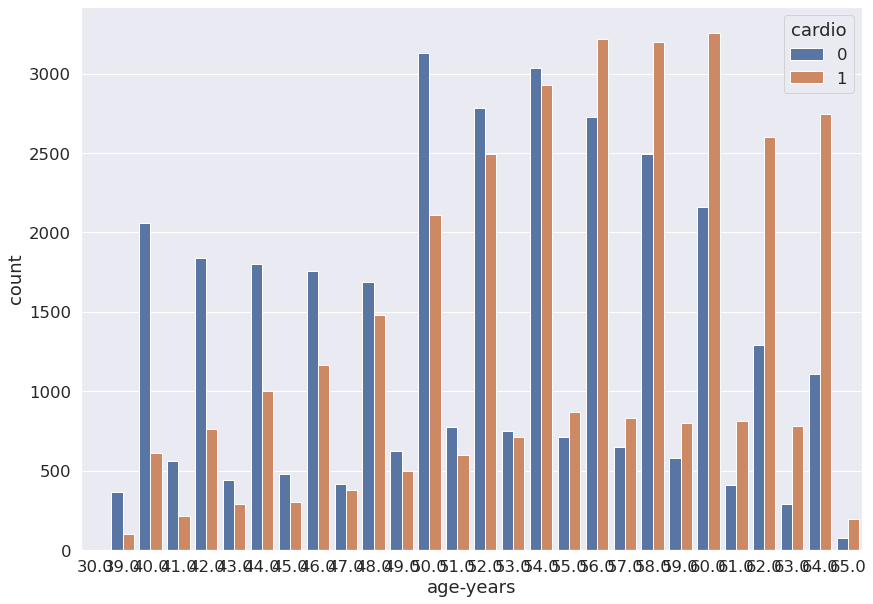

In [60]:
df['age-years'].astype('int')
f, ax = plt.subplots(figsize=(14, 10))
sns.countplot(x='age-years', hue='cardio', data=df);

In [211]:
sns.countplot?